# Cargar la base

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

<ipython-input-32-dc6dd172c19c>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])
stopwords.extend(['podemosen', 'podemen', 'ministro', 'ministra', 'ss', 'ruego', 'aprobado', 'aprobada'])
stopwords.extend(['diputado', 'diputada', 'don', 'doña', 'vicepresidenta', 'sagastizab', 'unzetabarrenetxea', 'agirretxea', 'urresti', 'escrutinio', 'dijo', 'dice', 'quevedo'])
stopwords.extend(['campuzano', 'beitialarrangoitia', 'gonzalezmoro', 'mixto'])

In [ ]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [ ]:
stopwords.extend(nombres)

In [ ]:
partidos=pd.read_csv('/content/drive/MyDrive/partidos.csv', encoding='latin1', sep=';')

In [ ]:
for x in partidos['nombre'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(str(a).split())
  stopwords.extend(a)

for x in partidos['1'].unique():
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['2'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['3'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

In [ ]:
len(stopwords)

4481

In [ ]:
# elimino acentos de los tokens
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
lista = []
for row in base.values:
    row[20]=row[20].translate(trans)
    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

In [ ]:
# llevo las stopwords a minúsculas y elimino acentos
stopwords=[x.lower() for x in stopwords if type(x)==str]
stopwords=[x.translate(trans) for x in stopwords if type(x)==str]

# Ordenes del día

In [ ]:
# Hay 28mil órdenes del día únicas
len(base.orden.unique())

28566

In [ ]:
# Para un total de 334mil discursos
len(base)

334421

In [ ]:
# Este es el listado de las 40 ordenes del día con más discursos, y su número de discursos.
base['orden'].value_counts()[:40]

VOTACIONES:                                                                                                                                                                             939
DICTAMENES DE COMISION SOBRE INICIATIVAS LEGISLATIVAS:  — PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1989                                                                838
PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1983                                                                                                                          738
-- PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1998 (Número                                                                                                               738
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. -PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA EL AÑO 2006.                                                        701
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. (CO

<Axes: >

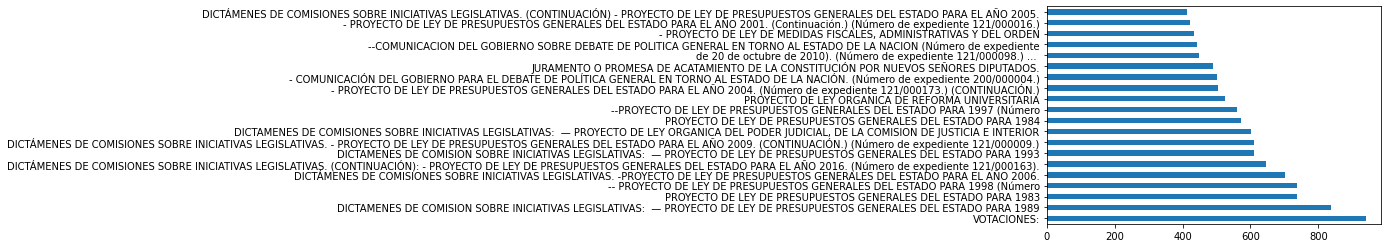

In [ ]:
base['orden'].value_counts()[:20].plot(kind='barh')

In [ ]:
import numpy as np

for e in (5,10, 25, 50, 80, 95):
  print(f"Percentil " +str(e)+ ": "+ str(np.percentile(base['orden'].value_counts(), e)))

Percentil 5: 2.0
Percentil 10: 2.0
Percentil 25: 5.0
Percentil 50: 7.0
Percentil 80: 14.0
Percentil 95: 30.0


<ipython-input-47-c17038fed3c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=seaborn.distplot(base['orden'].value_counts(),


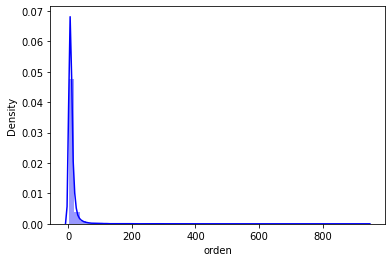

In [ ]:
import seaborn
from scipy.stats import binom
ax=seaborn.distplot(base['orden'].value_counts(),
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22})

In [ ]:
# Se genera una base corta que contiene solo los discursos que pertenecen en alguna de las 100 ordenes del día más frecuentes
base_corta=base.loc[base['orden'].isin(base['orden'].value_counts()[:100].keys())]

In [ ]:
# elimino acentos de las ordenes del día y las convierto a minúscula
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
lista = []
for row in base.values:
    row[1]=str(row[1]).translate(trans)
    row[1]=row[1].lower()
    row[1]=''.join([i for i in row[1] if not i.isdigit()])
    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

# Mencionadas en al menos 10 discursos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords , min_df=10)
bow = vect.fit_transform(base['tokens'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


# Mencionadas al menos 100 veces en total
(spoken at least 100 times across al sessions)

In [ ]:
new_voc={}
for token in vect.vocabulary_: 
  if vect.vocabulary_[token]>100:
    new_voc[token]=vect.vocabulary_[token]

In [ ]:
len(new_voc)

270231

# Mencionadas al menos 10 veces en un día
(spoken at least 10 times in at least one session)

In [ ]:
base.fecha=pd.to_datetime(base.fecha.values, format='%d/%m/%Y')

In [ ]:
# Gentzkow et.al. usan mencionadas al menos 10 veces en una "sesión". Acá se usa mencionadas al menos 10 veces en un "día". 
new_voc2={}
vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords)
for x in base.fecha.unique(): 
  base_dia=base[pd.DatetimeIndex(base.fecha)==x]
  try: 
    bow = vect.fit_transform(base_dia['tokens'])
    for token in vect.vocabulary_: 
      if vect.vocabulary_[token]>10:
        new_voc2[token]=vect.vocabulary_[token]
  except: pass

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ahuja', 'alcañiz', 'amor', 'arreciado', 'barcena', 'barnuevo', 'capel', 'capitan', 'cascos', 'castejon', 'cienfuegos', 'compromis', 'congr', 'escandon', 'estefani', 'figueroa', 'fortun', 'hickman', 'huarte', 'jeltzalea', 'jovellanos', 'lasquetty', 'latorre', 'legaz', 'lersundi', 'llin', 'machuca', 'maillo', 'mancisidor', 'margallo', 'maribona', 'marlaska', 'medel', 'menchero', 'mendicoa', 'na', 'olivares', 'patxi', 'peces', 'pedrero', 'pinilla', 'piñero', 'ponga', 'pujalte', 'salmones', 'santesmases', 'sito', 'soro', 'sotelo', 'tagle', 'tesorero', 'tizon', 'toledano', 'torrecilla', 'trevijano', 'valdecasas', 'valdes', 'vargas', 'villaseñor', 'ximo', 'yañez'] not in stop_words.
  warnings.warn(


In [ ]:
len(new_voc2)

7719234

# Combinación

In [ ]:
inter=set(new_voc2).intersection(new_voc)

In [ ]:
vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords ,vocabulary=inter)
bow = vect.fit_transform(base['tokens'])
total_features = len(vect.vocabulary_)

In [ ]:
# La intersección genera un vocabulario de apenas 814 bigramas. 
total_features

270230

In [ ]:
matrix = bow

# LDA sobre ordenes del día

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2,2), stop_words=stopwords, vocabulary=inter)
bow_ordenes = vect.fit_transform(base['orden'])
lda = LatentDirichletAllocation(n_components=15, max_iter=50, learning_method='batch', learning_offset=50.,random_state=0)     
lda.fit(bow_ordenes)

LatentDirichletAllocation(learning_offset=50.0, max_iter=50, n_components=15,
                          random_state=0)

In [ ]:
bow_ordenes.shape

(334421, 270230)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
# Topics by weights
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
salario minimo , formula industria , senado proyecto , guardia civil , industria turismo , turismo comercio , poder adquisitivo , comparecencia trabajo , ministerio defensa , patrimonio historico , cuerpo guardia , civil numero , comision defensa , extraordinaria comision , comparecencia hacienda , organica proteccion , proteccion seguridad , proyecto patrimonio , edad jubilacion , comparecencia defensa
Topic 2:
formula sanidad , sanidad consumo , comparecencia pleno , general numero , empleo seguridad , reglamento informar , formula empleo , proposicion organica , conformidad dispuesto , ministerio sanidad , dar cumplimiento , desempleo numero , sentencia tribunal , estatuto autonomia , articulo reglamento , regimen juridico , plan energetico , organica reforma , acuerdo reino , reino unido
Topic 3:
formula defensa , europea numero , proyecto reforma , fiscal numero , interior proyecto , reino republica , enjuiciamiento civil , comparecencia pleno , comparecencia informar , j

In [ ]:
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp
     

def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size
     

def display_topics_frex(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(frex(model)):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
# Topics by frex
display_topics_frex(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
formula industria , industria turismo , patrimonio historico , cuerpo guardia , turismo comercio , salario medio , modificacion edad , mercado alquiler , comparecencia industria , incremento salario , completa regimen , desarrollo reglamentario , proyecto completa , ambito aplicacion , politica seguridad , vivienda vacia , periodo extraordinario , convenio reconocimiento , legal cuarenta , maxima legal
Topic 2:
formula sanidad , formula empleo , dar cumplimiento , piensa dar , formula excma , cumplimiento sentencia , informar acerca , excma sra , periodo numero , juridico funcion , publica proteccion , mayo adoptan , sra sanidad , desea formular , formular numero , unido gran , gran bretaña , respecto numero , servicio portuario , dando cumplimiento
Topic 3:
formula defensa , comparecencia informar , conflicto irak , requieren atencion , organica consejo , renta patrimonio , sadam husein , republica francesa , reforma fiscal , seguridad internacional , prevencion blanqueo , fo


# Topic por discurso

In [ ]:
disc_weights=matrix*lda.components_.transpose()
base['Topic_weight']=disc_weights.argmax(axis=1)+1

In [ ]:
import scipy as sp
from scipy.special import logsumexp
import numpy as np
     

def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out
     

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size
     

def t_FREX(row):
  return frex_df[matrix[row['id']].argmax()].argsort()[9]

In [ ]:
base['id']=range(0,334421)
frex_df=pd.DataFrame(frex(lda))

# Se crea una columna con el topic que se asigna por frex a cada discurso de la base
base['Topic_FREX']=base.apply (lambda row: t_FREX(row), axis=1)+1

# A mano

In [ ]:
base.shape

(334421, 40)

In [ ]:
base['reglas y procedemientos']=0
base['Administración']=0
base['Economía']=0
base['Energía']=0
base['Seguridad']=0
base['Política Laboral']=0
base['Transporte']=0
base['Comunicaciones']=0
base['Social']=0
base['Educación']=0
base['Seguridad Social']=0
base['Justicia']=0
base['Internacionales']=0
base['Política Interna']=0
base['Otros']=0

lista=[]
for row in base.values:
  
  # Reglas y Procedimientos
    if 'dictamen' in row[1]: row[24]=1
    if 'designacion' in row[1]: row[24]=1
    if 'decreto' in row[1]: row[24]=1
    if 'ley' in row[1]: row[24]=1
    if 'constitucion' in row[1]: row[24]=1
    if 'decisiones' in row[1]: row[24]=1
    if 'orden' in row[1]: row[24]=1
    if 'votacion' in row[1]: row[24]=1
    if 'intervencion' in row[1]: row[24]=1
    if 'nuevo gobierno' in row[1]: row[24]=1
    if 'resolucion' in row[1]: row[24]=1
    if 'modificacion' in row[1]: row[24]=1
    if 'comision' in row[1]: row[24]=1
    if 'comisión' in row[1]: row[24]=1
    if 'comi sion' in row[1]: row[24]=1
    if 'parlamentario' in row[1]: row[24]=1
    if 'presidencia' in row[1]: row[24]=1
    if 'presupuestos generales' in row[1]: row[24]=1
    if 'comunicacion del gobierno' in row[1]: row[24]=1
    if 'referendum' in row[1]: row[24]=1
    if 'eleccion' in row[1]: row[24]=1
    if 'miembros de la mesa' in row[1]: row[24]=1
    if 'diputa' in row[1]: row[24]=1
    if 'institucional' in row[1]: row[24]=1
    if 'legislativ' in row[1]: row[24]=1
    if 'mocion de censura' in row[1]: row[24]=1
    if 'constitución' in row[1]: row[24]=1
    if 'juramento' in row[1]: row[24]=1
    if 'extraordinaria' in row[1]: row[24]=1
    if 'extraorinaria' in row[1]: row[24]=1
    if 'votación de conjunto' in row[1]: row[24]=1
    if 'reglamento del congreso' in row[1]: row[24]=1
    if 'prórroga de plazo' in row[1]: row[24]=1
    if 'autoprotección de la cámara' in row[1]: row[24]=1
    if 'avocación por el pleno' in row[1]: row[24]=1
    if 'minuto de silencio' in row[1]: row[24]=1
    if 'prórrogas de plazo' in row[1]: row[24]=1
    if 'exclusión de los puntos' in row[1]: row[24]=1
    if 'canje de notas' in row[1]: row[24]=1
    if 'tramitación directa y en lectura única' in row[1]: row[24]=1
    if 'votación final' in row[1]: row[24]=1
    if 'expedi' in row[1]: row[24]=1
    if 'artícul' in row[1]: row[24]=1
    if 'constitucion interina de la cama' in row[1]: row[24]=1
    if 'designacion de la' in row[1]: row[24]=1
    if 'asuntos tratados y decisiones  adoptadas por l' in row[1]: row[24]=1
    if 'cuestiones de orden' in row[1]: row[24]=1
    if 'cumplimiento de las previsiones contenidas en' in row[1]: row[24]=1
    
  # Administración
    if 'gobierno' in row[1]: row[25]=1
    if 'administra' in row[1]: row[25]=1
    if 'funcionarios' in row[1]: row[25]=1
    if 'acuerdo' in row[1]: row[25]=1
    if 'ejecutivo' in row[1]: row[25]=1
    if 'publica' in row[1]: row[25]=1
    if 'minist' in row[1]: row[25]=1
    if 'el rey' in row[1]: row[25]=1
    if 'president' in row[1]: row[25]=1
    if 'secretari' in row[1]: row[25]=1
  
  # Economía
    if 'economi' in row[1]: row[26]=1
    if 'empresa' in row[1]: row[26]=1
    if 'desequilibrios territoriales' in row[1]: row[26]=1
    if 'presupuesto' in row[1]: row[26]=1
    if 'industria' in row[1]: row[26]=1
    if 'agricultura' in row[1]: row[26]=1
    if 'import' in row[1]: row[26]=1
    if 'export' in row[1]: row[26]=1
    if 'miner' in row[1]: row[26]=1
    if 'olivare' in row[1]: row[26]=1
    if 'pesca' in row[1]: row[26]=1
    if 'garbanzo' in row[1]: row[26]=1
    if 'sector' in row[1]: row[26]=1
    if 'precio' in row[1]: row[26]=1
    if 'siderurg' in row[1]: row[26]=1
    if 'financiac' in row[1]: row[26]=1
    if 'agraria' in row[1]: row[26]=1
    if 'impuesto' in row[1]: row[26]=1
    if 'salario' in row[1]: row[26]=1
    if 'zona franca' in row[1]: row[26]=1
    if 'plan informatico' in row[1]: row[26]=1
    if 'arrendamiento' in row[1]: row[26]=1
    if 'financier' in row[1]: row[26]=1
    if 'pesquer' in row[1]: row[26]=1
    if 'deuda' in row[1]: row[26]=1
    if 'comercio' in row[1]: row[26]=1
    if 'tribunal de cuentas' in row[1]: row[26]=1
    if 'forppa' in row[1]: row[26]=1
    if 'sociedades de garantia reciproca' in row[1]: row[26]=1
    if 'feoga' in row[1]: row[26]=1
    if 'competencia' in row[1]: row[26]=1
    if 'caucho' in row[1]: row[26]=1
    if 'fondo monetario' in row[1]: row[26]=1
    if 'inversion' in row[1]: row[26]=1
    if 'bankia' in row[1]: row[26]=1
    if 'icac' in row[1]: row[26]=1
    if 'denominaciones de origen' in row[1]: row[26]=1
    if 'montes vecinales' in row[1]: row[26]=1

  #Energía
    if 'politica energetica' in row[1]: row[27]=1
    if 'energetic' in row[1]: row[27]=1
    if 'central nuclear' in row[1]: row[27]=1
    if 'petrol' in row[1]: row[27]=1
    if 'hunosa' in row[1]: row[27]=1
    if 'embalse de jánovas' in row[1]: row[27]=1
    if 'energia' in row[1]: row[27]=1
  
  # Seguridad
    if 'seguridad' in row[1]: row[28]=1
    if 'proteccion' in row[1]: row[28]=1
    if 'ejercito' in row[1]: row[28]=1
    if 'policia' in row[1]: row[28]=1
    if 'carceles' in row[1]: row[28]=1
    if 'avion' in row[1]: row[28]=1
    if 'servicio civil' in row[1]: row[28]=1
    if 'arma' in row[1]: row[28]=1
    if 'atentado' in row[1]: row[28]=1
    if 'militar' in row[1]: row[28]=1
    if 'incidentes' in row[1]: row[28]=1
    if 'terroris' in row[1]: row[28]=1
    if 'misil' in row[1]: row[28]=1
    if 'tortura' in row[1]: row[28]=1
    if 'fuerzas españolas' in row[1]: row[28]=1
    if 'numero de llamada de emergencia' in row[1]: row[28]=1
    

  # Política laboral
    if 'politica laboral' in row[1]: row[29]=1
    if 'laboral' in row[1]: row[29]=1
    if 'patrimonio sindical' in row[1]: row[29]=1  
    if 'trabaj' in row[1]: row[29]=1
    if 'empleo' in row[1]: row[29]=1
    if 'oit' in row[1]: row[29]=1

  # Transporte
    if 'aereo' in row[1]: row[30]=1
    if 'aviacion' in row[1]: row[30]=1
    if 'aeronaval' in row[1]: row[30]=1
    if 'ferrocarril' in row[1]: row[30]=1
    if 'carretera' in row[1]: row[30]=1
    if 'flota mercante' in row[1]: row[30]=1
    if 'grupo iberia' in row[1]: row[30]=1
    if 'arrastrero' in row[1]: row[30]=1
    if 'seitt' in row[1]: row[30]=1
  
  # Comunicaciones  
    if 'televisi' in row[1]: row[31]=1
    if 'periodico' in row[1]: row[31]=1
    if 'comunicacion' in row[1]: row[31]=1
    if 'cinematog' in row[1]: row[31]=1
    if 'no-do' in row[1]: row[31]=1
    if 'tve' in row[1]: row[31]=1
    if 'telefon' in row[1]: row[31]=1

  # Sociedad
    if 'divorcio' in row[1]: row[32]=1
    if 'futbol' in row[1]: row[32]=1
    if 'dia de la' in row[1]: row[32]=1
    if 'censo' in row[1]: row[32]=1
    if 'mujer' in row[1]: row[32]=1
    if 'jornada maxima' in row[1]: row[32]=1
    if 'codigo civil' in row[1]: row[32]=1
    if 'parque nacional' in row[1]: row[32]=1

  # Educación, Ciencia y Tecnología
    if 'colegio' in row[1]: row[33]=1
    if 'enseñanza' in row[1]: row[33]=1
    if 'escolar' in row[1]: row[33]=1
    if 'educacion' in row[1]: row[33]=1
    if 'educación' in row[1]: row[33]=1
    if 'alumno' in row[1]: row[33]=1
    if 'bachillerato' in row[1]: row[33]=1
    if 'escuela' in row[1]: row[33]=1
    if 'cientifica' in row[1]: row[33]=1
    if 'educativo' in row[1]: row[33]=1
    if 'technological' in row[1]: row[33]=1
    

  # Seguridad Social y Ambiental
    if 'seguridad social' in row[1]: row[34]=1
    if 'inundacion' in row[1]: row[34]=1
    if 'avenidas de la cuenca' in row[1]: row[34]=1
    if 'invalidez' in row[1]: row[34]=1
    if 'situacion sanitaria' in row[1]: row[34]=1
    if 'tercera edad' in row[1]: row[34]=1
    if 'pension' in row[1]: row[34]=1
    if 'desempleo' in row[1]: row[34]=1
    if 'evacuado' in row[1]: row[34]=1
    if 'minusvalido' in row[1]: row[34]=1
    if 'droga' in row[1]: row[34]=1
    if 'emigra' in row[1]: row[34]=1
    if 'inmigra' in row[1]: row[34]=1
    if 'vivienda' in row[1]: row[34]=1
    if 'matrimoni' in row[1]: row[34]=1
    if 'salud' in row[1]: row[34]=1
    if 'alimentari' in row[1]: row[34]=1
    if 'toxico' in row[1]: row[34]=1
    if 'contaminacion' in row[1]: row[34]=1
    if 'recursos vivos' in row[1]: row[34]=1
    if 'diversidad biologica' in row[1]: row[34]=1
    if 'zonas especialmente protegidas' in row[1]: row[34]=1
    if 'protocolo de montreal' in row[1]: row[34]=1
    if 'medio ambiente' in row[1]: row[34]=1
    if 'derechos humanos' in row[1]: row[34]=1
    if 'protección' in row[1]: row[34]=1
    if 'sanitaria' in row[1]: row[34]=1
    if 'derecho de asilo' in row[1]: row[34]=1
    
        
  # Justicia
    if 'justicia' in row[1]: row[35]=1
    if 'escuchas telefonicas' in row[1]: row[35]=1
    if 'defensor del pueblo' in row[1]: row[35]=1
    if 'fiscal' in row[1]: row[35]=1
    if 'judicial' in row[1]: row[35]=1
    if 'juridico' in row[1]: row[35]=1
    if 'jurídico' in row[1]: row[35]=1
    if 'amparo' in row[1]: row[35]=1

  # Internacionales
    if 'internacional' in row[1]: row[36]=1
    if 'europ' in row[1]: row[36]=1
    if 'estados unidos' in row[1]: row[36]=1
    if 'atlantico norte' in row[1]: row[36]=1
    if 'norteamerica' in row[1]: row[36]=1
    if 'la cee' in row[1]: row[36]=1
    if 'jordania' in row[1]: row[36]=1
    if 'naciones unidas' in row[1]: row[36]=1
    if 'interamericana' in row[1]: row[36]=1
    if 'extranjero' in row[1]: row[36]=1
    if 'islandia' in row[1]: row[36]=1
    if 'holand' in row[1]: row[36]=1
    if 'multinacional' in row[1]: row[36]=1
    if 'australia' in row[1]: row[36]=1
    if 'israel' in row[1]: row[36]=1
    if 'artículo k.3' in row[1]: row[36]=1
    if 'artículo k. 3' in row[1]: row[36]=1
    if 'copenhague' in row[1]: row[36]=1
    if 'ocde' in row[1]: row[36]=1
    if 'austria' in row[1]: row[36]=1
    if 'alfonso dastis quecedo' in row[1]: row[36]=1
    if 'convención de la hay' in row[1]: row[36]=1
    

  # Política Interna
    if 'vasco' in row[1]: row[37]=1
    if 'electoral' in row[1]: row[37]=1
    if 'cataluña' in row[1]: row[37]=1
    if 'andalucia' in row[1]: row[37]=1
    if 'ciudad' in row[1]: row[37]=1
    if 'españa' in row[1]: row[37]=1
    if 'albacete' in row[1]: row[37]=1
    if 'cadiz' in row[1]: row[37]=1
    if 'asturia' in row[1]: row[37]=1
    if 'palmas' in row[1]: row[37]=1
    if 'navarra' in row[1]: row[37]=1
    if 'maspalomas' in row[1]: row[37]=1
    if 'barcelona' in row[1]: row[37]=1
    if 'canaria' in row[1]: row[37]=1
    if 'gibraltar' in row[1]: row[37]=1
    if 'aragon' in row[1]: row[37]=1
    if 'extremadura' in row[1]: row[37]=1
    if 'ibiza' in row[1]: row[37]=1
    if 'castilla' in row[1]: row[37]=1
    if 'autonomia' in row[1]: row[37]=1
    if 'segovia' in row[1]: row[37]=1
    if 'catalana' in row[1]: row[37]=1
    if 'islas baleares' in row[1]: row[37]=1
    if 'illes balears' in row[1]: row[37]=1
    if 'madrid' in row[1]: row[37]=1
    if 'murcia' in row[1]: row[37]=1
    if 'ayuntamiento' in row[1]: row[37]=1
    if 'estatuto de autonomía' in row[1]: row[37]=1
    if 'estatutos de autonomía' in row[1]: row[37]=1
    if 'torremolinos' in row[1]: row[37]=1
    if 'la misión a la luz de su extensión hacia el oeste y el sur del país' in row[1]: row[37]=1
    if 'cuenca' in row[1]: row[37]=1
    if 'autoridades locales' in row[1]: row[37]=1
    if 'comunidades autonomas' in row[1]: row[37]=1
    if 'zoido álvarez' in row[1]: row[37]=1

  # Otros
    if 'hechos acaecidos' in row[1]: row[38]=1
    if 'akáa' in row[1]: row[38]=1
    if 'picasso' in row[1]: row[38]=1
    if 'muerte' in row[1]: row[38]=1
    if 'del señor' in row[1]: row[38]=1
    if '1981' in row[1]: row[38]=1
    if 'preguntas' in row[1]: row[38]=1
    if 'convivencia' in row[1]: row[38]=1
    if 'simon bolivar' in row[1]: row[38]=1
    if 'interpelaciones urgentes' in row[1]: row[38]=1
    if 'recomendaciones' in row[1]: row[38]=1
    if 'screto profesional' in row[1]: row[38]=1
    if 'octubre de 1986' in row[1]: row[38]=1
    if 'sucesivos.' in row[1]: row[38]=1
    if 'debate sobre el estado de la nacion' in row[1]: row[38]=1
    if '30 de noviembre de 1999' in row[1]: row[38]=1
    if 'septiembre de 2000' in row[1]: row[38]=1
    if 'propuestas de resolución' in row[1]: row[38]=1
    if 'nan' in row[1]: row[38]=1
    if 'recuperacion automatica' in row[1]: row[38]=1
    if 'del grupo socialista del' in row[1]: row[38]=1
    if 'del grupo pa' in row[1]: row[38]=1
    if 'coag y upa' in row[1]: row[38]=1
    if 'rumores' in row[1]: row[38]=1
    if 'psoe que provoca' in row[1]: row[38]=1
    if 'viii legislatura' in row[1]: row[38]=1
    if 'públicos y privados' in row[1]: row[38]=1
    if 'modificación' in row[1]: row[38]=1
    if 'públicas' in row[1]: row[38]=1
    if 'acudir estos' in row[1]: row[38]=1
    if 'públicas' in row[1]: row[38]=1
    if 'swd (2013) 472 final' in row[1]: row[38]=1
    if 'zurita expósito' in row[1]: row[38]=1
    if 'condolencia' in row[1]: row[38]=1
    if 'convención de la haya de 1954' in row[1]: row[38]=1
    if 'xviii, yo creo que hay que irse a los siglos xix o xx' in row[1]: row[38]=1
    if 'dé mayo de .—núm.' in row[1]: row[38]=1
    if '| de octubre de .—núm.' in row[1]: row[38]=1
    if 'dé mayo de .—núm. ' in row[1]: row[38]=1
    if 'final] [swd ()  final] [swd ()  final].' in row[1]: row[38]=1
    
    

    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

In [ ]:
base['topic_a_mano']=base['reglas y procedemientos']+base['Administración']+base['Economía']+base['Energía']+base['Seguridad']+base['Política Laboral']+base['Transporte']+base['Comunicaciones']+base['Social']+base['Educación']+base['Seguridad Social']+base['Justicia']+base['Internacionales']+base['Política Interna']+base['Otros']

In [ ]:
base.loc[base['topic_a_mano']==0].shape

(0, 40)

In [ ]:
base.loc[base['topic_a_mano']==0].head(50)['orden']

Series([], Name: orden, dtype: object)

<Axes: >

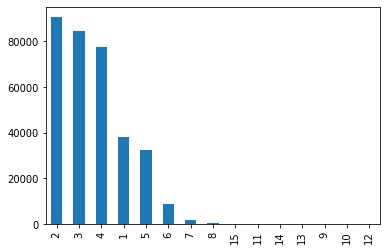

In [ ]:
import matplotlib.pyplot as plt
base['topic_a_mano'].value_counts().plot(kind='bar')

In [ ]:
portopic=(base['reglas y procedemientos'].sum(),
base['Administración'].sum(),
base['Economía'].sum(),
base['Energía'].sum(),
base['Seguridad'].sum(),
base['Política Laboral'].sum(),
base['Transporte'].sum(),
base['Comunicaciones'].sum(),
base['Social'].sum(),
base['Educación'].sum(),
base['Seguridad Social'].sum(),
base['Justicia'].sum(),
base['Internacionales'].sum(),
base['Política Interna'].sum(),
base['Otros'].sum())

nombres=['reglas y procedemientos', 'Administración', 'Economía', 'Energía', 'Seguridad', 'Política Laboral', 'Transporte', 'Comunicaciones', 'Social', 'Educación', 'Seguridad Social', 'Justicia', 'Internacionales', 'Política Interna', 'Otros']

<BarContainer object of 15 artists>

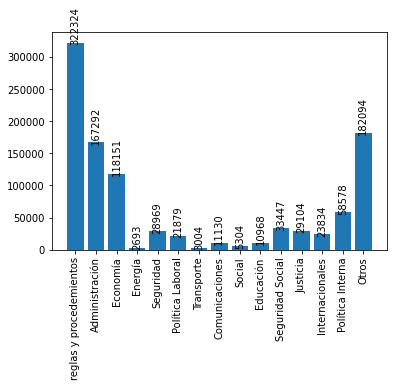

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', horizontalalignment='center')
        

plt.xticks(rotation='vertical')
addlabels(nombres, portopic)
plt.bar(nombres, portopic)

# Topics no mode

In [ ]:
base.shape

(334421, 40)

In [ ]:
base['topis_designado_a_mano']=0
lista=[]
for row in base.values:
  if row[24]==1: row[40]=1
  if row[25]==1: row[40]=2
  if row[26]==1: row[40]=3
  if row[27]==1: row[40]=4
  if row[28]==1: row[40]=5
  if row[29]==1: row[40]=6
  if row[30]==1: row[40]=7
  if row[31]==1: row[40]=8
  if row[32]==1: row[40]=9
  if row[33]==1: row[40]=10
  if row[34]==1: row[40]=11
  if row[35]==1: row[40]=12
  if row[36]==1: row[40]=13
  if row[37]==1: row[40]=14
  if row[38]==1: row[40]=15
  lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)  

In [ ]:
# Cantidad total de discursos asignados a cada topic por weight
# El discurso se asigna a un topic multiplicando los bigramas que aparecen en LA ORDEN DEL DÍA por la probabilidad de pertenencia de ese bigrama a cada topic y sumando, luego el topic con mayor probabilidad se asigna como topic del discurso
base['Topic_weight'].value_counts()

1     328796
10       856
8        794
12       706
4        470
9        448
3        373
7        361
6        326
2        324
15       253
5        241
14       175
11       162
13       136
Name: Topic_weight, dtype: int64

In [ ]:
# Cantidad total de discursos asignados a cada topic por Frex
# El discurso se asigna a un topic multiplicando los bigramas que aparecen en LA ORDEN DEL DÍA por la probabilidad de pertenencia de ese bigrama a cada topic y sumando, luego el topic con mayor probabilidad se asigna como topic del discurso
base['Topic_FREX'].value_counts()

1     325666
3       7077
7        487
15       359
14       214
2        181
8        129
4        101
13        81
11        80
6         18
9         13
10        10
12         3
5          2
Name: Topic_FREX, dtype: int64

In [ ]:
# Cantidad total de discursos asignados a cada topic por ASIGNACION MANUAL
base['topic_designado_a_mano'].value_counts()

15    182094
3      44450
1      32520
14     18858
12     12560
2       8995
13      7471
11      7447
5       5514
8       4673
6       4410
10      3036
4        985
9        931
7        477
Name: topis_designado_a_mano, dtype: int64

In [ ]:
# Por LEGISLATURA por WEIGHTS
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
topics_por_legislatura=pd.DataFrame()
for x in legislaturas: 
  base_legislatura=base[base.legislatura==x]
  topics_por_legislatura[x]=base_legislatura['Topic_weight'].value_counts().sort_index()
topics_por_legislatura

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII
1,7425,33476,24516,32349,24933,36720,41304,34976,31400.0,40033,874.0,19545.0,1245.0
2,53,102,32,41,15,27,32,16,1.0,5,NaN,NaN,NaN
3,34,95,68,86,24,21,14,7,5.0,14,NaN,4.0,1.0
4,60,220,85,12,7,63,15,1,2.0,3,NaN,2.0,NaN
5,35,68,55,19,8,32,3,11,2.0,6,NaN,2.0,NaN
6,27,97,45,36,18,21,11,15,15.0,28,3.0,8.0,2.0
7,41,150,53,43,11,38,6,1,3.0,9,1.0,3.0,2.0
8,98,189,98,67,23,112,21,33,37.0,92,2.0,20.0,2.0
9,38,191,40,41,7,91,6,5,5.0,21,NaN,3.0,NaN
10,148,244,105,73,42,116,27,35,17.0,38,1.0,9.0,1.0


In [ ]:
# Por LEGISLATURA por FREX
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
topics_por_legislatura=pd.DataFrame()
for x in legislaturas: 
  base_legislatura=base[base.legislatura==x]
  topics_por_legislatura[x]=base_legislatura['Topic_FREX'].value_counts().sort_index()
topics_por_legislatura

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII
1,7328,33080,24167.0,31823.0,24736,36227.0,41141.0,34768.0,31240.0,39653.0,868.0,19409.0,1226.0
2,14,57,22.0,27.0,7,26.0,6.0,8.0,5.0,6.0,NaN,2.0,1.0
3,643,1711,860.0,929.0,342,941.0,262.0,310.0,246.0,607.0,15.0,185.0,26.0
4,11,36,21.0,11.0,2,8.0,5.0,NaN,2.0,2.0,NaN,3.0,NaN
7,35,154,73.0,61.0,26,85.0,22.0,22.0,2.0,5.0,NaN,2.0,NaN
8,1,11,35.0,66.0,6,7.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN
9,2,2,NaN,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
10,1,1,1.0,NaN,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,3,32,20.0,14.0,7,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
13,12,17,21.0,1.0,4,16.0,2.0,1.0,NaN,3.0,NaN,4.0,NaN


In [ ]:
# Por LEGISLATURA por DESIGNACION MANUAL
legislaturas=['I', 'II', 'III', 'IV', 'V', 'VI', 'VII','VIII', 'IX', 'X', 'XI', 'XII','XIII']
topics_por_legislatura=pd.DataFrame()
for x in legislaturas: 
  base_legislatura=base[base.legislatura==x]
  topics_por_legislatura[x]=base_legislatura['topic_designado_a_mano'].value_counts().sort_index()
topics_por_legislatura

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII
1,1075,4441,1737,2416,3327,4210,3724,3580.0,2171.0,3462,80.0,2128.0,169.0
2,170,3019,461,509,756,558,599,450.0,509.0,741,223.0,835.0,165.0
3,1774,7744,4459,4831,2510,4496,4223,4333.0,3244.0,5557,23.0,1193.0,63.0
4,204,458,30,197,46,11,8,NaN,NaN,31,NaN,NaN,NaN
5,422,1576,645,258,281,495,299,424.0,297.0,590,NaN,215.0,12.0
6,483,1442,189,91,484,215,278,217.0,365.0,523,20.0,103.0,NaN
7,6,182,148,2,14,26,27,29.0,NaN,26,NaN,17.0,NaN
8,234,1127,681,343,912,632,186,124.0,108.0,192,NaN,92.0,42.0
9,63,274,68,69,111,35,33,122.0,NaN,123,NaN,33.0,NaN
10,261,1520,83,301,42,129,189,240.0,72.0,122,NaN,77.0,NaN


In [ ]:
# Por AÑO por FREX
topics_por_año=pd.DataFrame()
for x in range (1979, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  topics_por_año[x]=base_year['Topic_FREX'].value_counts().sort_index()
topics_por_año

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,1911,2944,1403,1298.0,11346,11038,8886,4367,7367,9745,...,8906.0,7388.0,10143.0,11309.0,10043.0,8027.0,2981.0,7464.0,8191,2869.0
2,3,6,3,2.0,15,16,21,10,5,8,...,1.0,3.0,1.0,2.0,1.0,2.0,NaN,NaN,2,1.0
3,131,323,149,41.0,573,444,625,209,200,213,...,106.0,51.0,315.0,104.0,110.0,71.0,30.0,24.0,145,27.0
4,5,3,1,2.0,23,3,9,6,8,6,...,2.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2,NaN
7,9,15,9,2.0,37,79,31,24,19,25,...,NaN,NaN,1.0,NaN,3.0,1.0,NaN,1.0,1,NaN
13,6,2,4,NaN,2,10,2,7,10,5,...,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,4,NaN
14,1,6,11,1.0,24,30,9,1,22,9,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2,NaN
15,8,17,16,3.0,25,26,37,9,10,15,...,2.0,4.0,4.0,2.0,1.0,1.0,NaN,1.0,3,2.0


In [ ]:
# Por AÑO por weights
topics_por_año=pd.DataFrame()
for x in range (1979, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  topics_por_año[x]=base_year['Topic_weight'].value_counts().sort_index()
topics_por_año

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,1915,3004,1424,1309.0,11537,11039,9154,4396,7356,9847,...,8974.0,7426.0,10419.0,11307,10102.0,8072.0,2994.0,7482.0,8305.0,2885.0
2,13,29,10,1.0,9,78,8,10,12,8,...,NaN,NaN,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12,16,1.0,18,33,32,21,20,27,...,2.0,3.0,1.0,5,4.0,2.0,NaN,NaN,3.0,2.0
4,8,31,15,6.0,44,83,65,43,21,28,...,1.0,NaN,NaN,3,NaN,NaN,NaN,NaN,2.0,NaN
5,12,12,11,1.0,12,34,16,6,37,13,...,NaN,1.0,1.0,5,NaN,NaN,NaN,NaN,1.0,1.0
6,2,17,7,2.0,18,28,44,11,21,11,...,9.0,5.0,7.0,14,4.0,1.0,5.0,1.0,4.0,3.0
7,8,20,12,1.0,28,72,42,11,23,10,...,1.0,NaN,4.0,3,2.0,NaN,3.0,NaN,1.0,2.0
8,25,38,32,3.0,41,76,55,36,35,20,...,15.0,3.0,14.0,37,26.0,14.0,2.0,4.0,15.0,3.0
9,10,20,6,2.0,109,46,28,12,18,9,...,1.0,2.0,5.0,10,2.0,4.0,1.0,1.0,1.0,NaN
10,34,76,26,12.0,66,95,62,37,46,18,...,5.0,4.0,3.0,18,10.0,7.0,2.0,1.0,7.0,1.0


In [ ]:
# Por AÑO por DESIGNACIÓN MANUAL
topics_por_año=pd.DataFrame()
for x in range (1979, 2020): 
  base_year=base[pd.DatetimeIndex(base.fecha).year==x]
  topics_por_año[x]=base_year['topic_designado_a_mano'].value_counts().sort_index()
topics_por_año

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,420,405,101,177,2010,1445,783,292,418,982,...,918.0,596.0,564,767,739,1367.0,246.0,808.0,944.0,380.0
2,61,33,49,127,685,1629,415,398,110,125,...,77.0,280.0,72,330,118,110.0,534.0,190.0,287.0,212.0
3,458,698,380,229,3646,2331,1672,1450,1745,1138,...,786.0,404.0,1678,1235,1347,1296.0,44.0,329.0,607.0,300.0
4,89,67,33,15,68,352,34,12,8,2,...,NaN,NaN,9,7,15,NaN,NaN,NaN,NaN,NaN
5,65,173,102,82,178,862,458,151,279,115,...,113.0,88.0,46,133,162,249.0,NaN,102.0,103.0,22.0
6,252,210,4,1,91,792,374,198,71,97,...,140.0,73.0,201,102,73,147.0,20.0,45.0,52.0,6.0
8,126,53,43,12,360,455,131,329,322,211,...,NaN,53.0,86,57,45,4.0,NaN,24.0,47.0,63.0
9,25,6,29,3,227,31,16,15,15,25,...,NaN,NaN,26,12,17,68.0,NaN,NaN,3.0,30.0
10,39,211,4,7,604,410,470,79,15,23,...,15.0,24.0,43,8,38,33.0,2.0,4.0,49.0,22.0
11,60,148,168,93,222,420,564,101,136,17,...,159.0,237.0,617,474,205,195.0,6.0,126.0,150.0,113.0


# Número óptimo de clusters

In [ ]:
# LDA en Sklearn tiene un resultado de score correspondiente al log-likelihood. En base a ese criterio se identifica el número óptimo de clusters. 
# Una versión acá: https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#13compareldamodelperformancescores

from sklearn.model_selection import GridSearchCV
import seaborn as sns

search_params = {'n_components': [10, 15, 50]}

model = LatentDirichletAllocation(max_iter=50, learning_method='online', learning_offset=50.,random_state=0)

gridsearch = GridSearchCV(model,
                          param_grid=search_params,
                          n_jobs=-1,
                          verbose=1, 
                          cv=2)
gridsearch.fit(bow_ordenes)

## Save the best model
best_lda = gridsearch.best_estimator_

cv_results_df = pd.DataFrame(gridsearch.cv_results_)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.pointplot(x="param_n_components",
              y="mean_test_score",
              data=cv_results_df)